In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

START ANALYSIS

In [5]:
data = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\trekantenEMA01')
data = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\trekantenEMA01_outlier_removal.csv', sep=';')
data.head()
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,temperature_c2.2,...,exp_valve_c2,superheat_c1,superheat_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
0,4.6,7.3,37.7,43.1,85.900000,42.30,14.411111,7.5,85.277778,42.2000,...,31.0,12.000000,12.022222,100.0,14.5,32.6,24.9,5.9,24.8,5.9
1,4.6,7.3,37.8,43.1,85.922222,42.30,14.555556,7.5,85.188889,42.2000,...,31.0,12.055556,11.988889,100.0,14.6,32.6,24.9,5.9,24.8,5.9
2,4.6,7.3,37.7,43.1,86.000000,42.35,14.512500,7.5,85.125000,42.2125,...,31.0,11.962500,12.000000,100.0,14.6,32.7,24.9,5.9,24.8,5.9
3,4.6,7.3,37.8,43.1,85.880000,42.34,14.510000,7.5,85.200000,42.2300,...,30.9,11.990000,12.000000,100.0,14.5,32.7,24.9,5.9,24.8,5.9
4,4.6,7.3,37.8,43.1,85.950000,42.30,14.425000,7.5,85.287500,42.2000,...,31.0,12.075000,12.037500,100.0,14.5,32.7,24.9,5.9,24.8,5.9


In [5]:
# statistical summary 
stat = data.describe()
print(stat)
stats = pd.DataFrame(stat)
stats.to_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\stats_long.csv', sep=';')

       temperature_cs1_c1  temperature_cs1_c2  temperature_HS1_c1  \
count       862119.000000       862142.000000        862148.00000   
mean             7.078964            8.723509            32.18442   
std              3.271897            2.575364             3.89510   
min             -6.500000           -5.600000             0.00000   
25%              4.700000            6.800000            29.10000   
50%              6.500000            7.900000            31.40000   
75%              9.200000           10.600000            34.70000   
max             21.900000           21.900000            51.00000   

       temperature_HS1_c2  temperature_c1.1  temperature_c1.2  \
count       862152.000000     862077.000000     862058.000000   
mean            35.075655         49.937988         33.658874   
std              4.683196         19.817491          5.008739   
min              0.000000          0.000000          0.000000   
25%             31.700000         31.600000         2

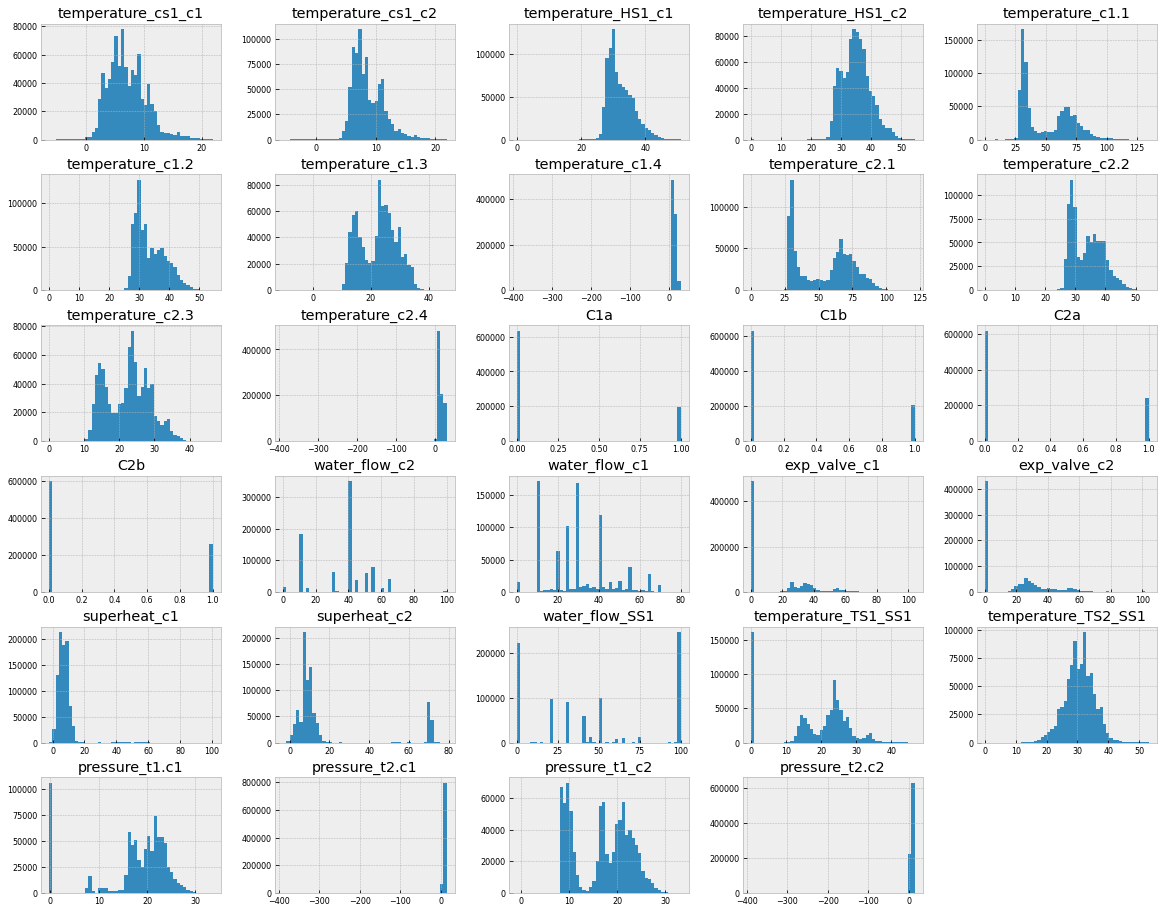

In [4]:
data.hist(figsize=(20, 16), bins=50, xlabelsize=8, ylabelsize=8); 

Time                      0
temperature_cs1_c1    13342
temperature_cs1_c2    13319
temperature_HS1_c1    13313
temperature_HS1_c2    13309
temperature_c1.1      13384
temperature_c1.2      13403
temperature_c1.3      13377
temperature_c1.4      13338
temperature_c2.1      13330
temperature_c2.2      13352
temperature_c2.3      13349
temperature_c2.4      14037
C1a                   42819
C1b                   42719
C2a                   14490
C2b                   13587
water_flow_c2         13539
water_flow_c1         13594
exp_valve_c1          42582
exp_valve_c2          13422
superheat_c1          13347
superheat_c2          13471
dtype: int64


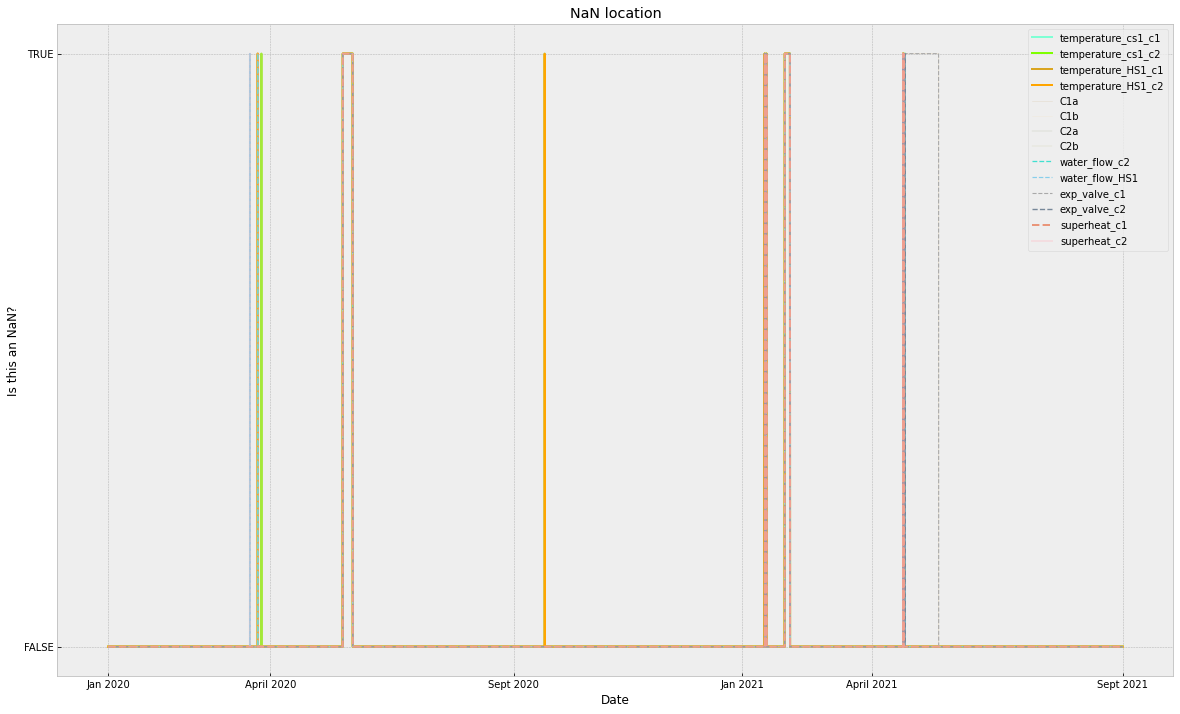

In [11]:
# identification of missing data
# count # of nan in temperature_HS1_down (variables with highest count)
n_nan = data.isna().sum()
print(n_nan)

na = data.isna()
nan_all = pd.DataFrame(na)
#nan_all.to_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\nan_all.csv', sep=';')

from matplotlib.ticker import FixedFormatter, FixedLocator

# df_temperature

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(nan_all['temperature_cs1_c1'], color = 'aquamarine')
ax.plot(nan_all['temperature_cs1_c2'], color = 'chartreuse')
ax.plot(nan_all['temperature_HS1_c1'], color = 'goldenrod')
ax.plot(nan_all['temperature_HS1_c2'], color = 'orange')
ax.plot(nan_all['C1a'], color = 'tan', linewidth= 0.6, alpha = 0.3)#, linewidth= 0.5)
ax.plot(nan_all['C1b'], color = 'wheat', linewidth= 0.5, alpha = 0.3)#, linewidth= 0.5)
ax.plot(nan_all['C2a'], color = 'darkolivegreen', linewidth= 0.4, alpha = 0.3)#, linestyle ='--', alpha = 0.3, linewidth= 0.5)
ax.plot(nan_all['C2b'], color = 'olive', linewidth= 0.3, alpha = 0.3)#, alpha = 0.5, linewidth= 0.4)
ax.plot(nan_all['water_flow_c2'], color = 'turquoise', linewidth= 1.3, linestyle = '--')#, linewidth = 0.3, alpha = 0.5)
ax.plot(nan_all['water_flow_c1'], color = 'skyblue', linewidth= 1.2, linestyle = '--')#, linestyle = '--', alpha = 0.4)
ax.plot(nan_all['exp_valve_c1'], color = 'darkgrey', linewidth= 1.1, linestyle = '--')
ax.plot(nan_all['exp_valve_c2'], color = 'lightslategrey', linewidth= 1.4, linestyle = '--')#, linestyle = '--', alpha = 0.3)
ax.plot(nan_all['superheat_c1'], color = 'darksalmon', linestyle = '--')
ax.plot(nan_all['superheat_c2'], color = 'lightpink', alpha = 0.3)

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

y_locator = FixedLocator([0, 1])
y_formatter = FixedFormatter(['FALSE', 'TRUE'])
ax.yaxis.set_major_locator(y_locator)
ax.yaxis.set_major_formatter(y_formatter)

plt.xlabel('Date')
plt.ylabel('Is this an NaN?')
plt.title('NaN location')
ax.legend(loc = 'best', labels=['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_HS1', 'exp_valve_c1', 'exp_valve_c2', 'superheat_c1', 'superheat_c2'])

plt.show()

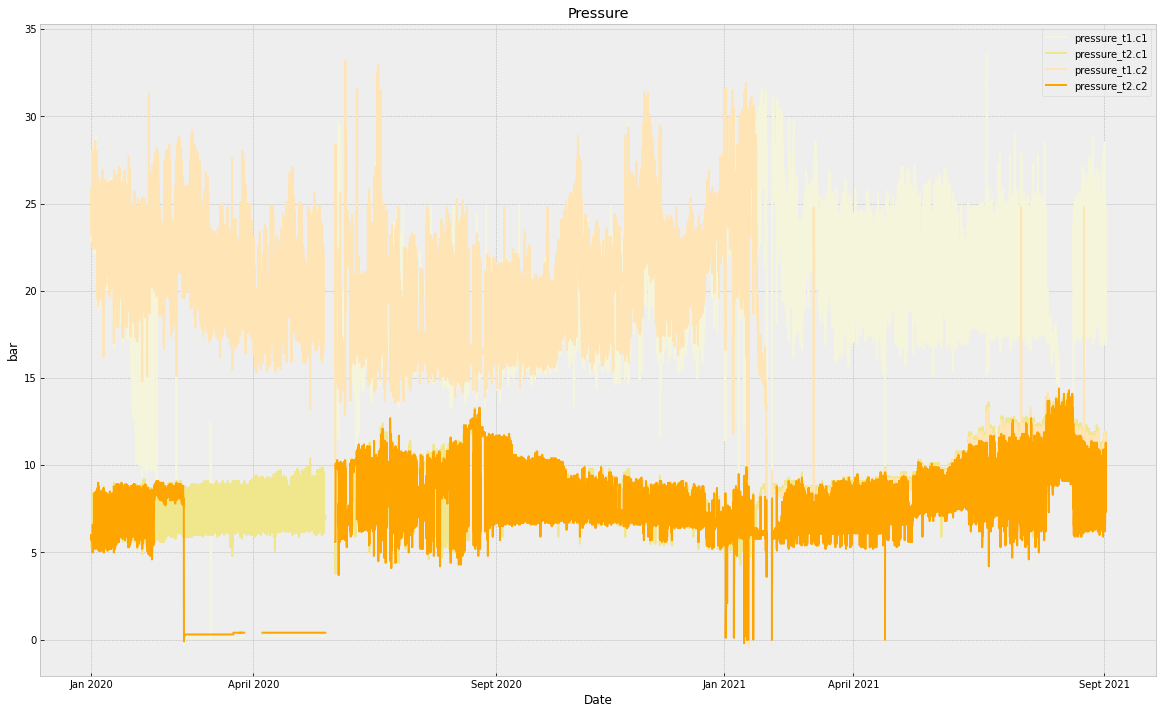

In [6]:
#pressure_t1.c1	pressure_t2.c1	pressure_t1_c2	pressure_t2.c2
from matplotlib.ticker import FixedFormatter, FixedLocator

# df_temperature

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(data['pressure_t1.c1'], color = 'beige')
ax.plot(data['pressure_t2.c1'], color = 'khaki')
ax.plot(data['pressure_t1_c2'], color = 'moccasin')
ax.plot(data['pressure_t2.c2'], color = 'orange')

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
plt.ylabel('bar')
plt.title('Pressure')
ax.legend(loc = 'best', labels=['pressure_t1.c1', 'pressure_t2.c1', 'pressure_t1.c2', 'pressure_t2.c2'])

plt.show()

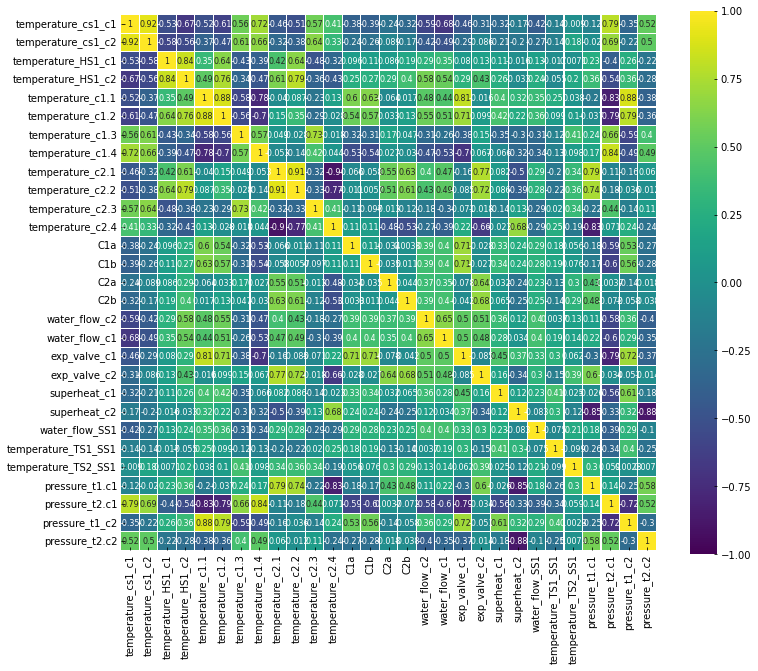

In [7]:
#heatmap

corr = data.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr,#[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True
            );

In [9]:
df = data.drop(['Time'], axis=1)

In [10]:
# normalize dataset for evaluation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)

In [11]:
from scipy.stats import pearsonr
def corrfunc(x,y, ax = None, **kws):
    r, _ = pearsonr(x,y)
    ax = ax or plt.gca()
    ax.annotate(f'p = {r:.2f}',xy=(.1,.9), xycoords = ax.transAxes)

In [16]:
df1 = data[540000:] # 547220 from Jan 2021

In [12]:
#scatterplot
sns.set()
#cols = ['temperature_circuit2_in','temperature_circuit1_in','temperature_HS1_up','temperature_HS1_down']
g = sns.pairplot(df1, diag_kind='hist', corner=True)#, hue='C2b')
g.map_lower(corrfunc)
plt.show()
#pair_plot.savefig("pair_plot.png")

NameError: name 'df1' is not defined

In [ ]:
df_num_corr = df_num.corr()[''][:-1]
golden_features_list = df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with relative humidity of exhausted air:\n{}".format(len(golden_features_list), golden_features_list))

In [18]:
# df_temperature
df_temperature = np.where(df_temperature > 100, np.nan, df_temperature)
df_temperature = np.where(df_temperature < -20, np.nan, df_temperature)

df_temperature = pd.DataFrame(df_temperature)
df_temperature.columns = ['t', 'temperature_CS_c1', 'temperature_CS_c2', 'temperature_HS_c1',  'temperature_HS_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4']

df_temperature = df_temperature.drop(['t'], axis =1)

df_temperature.describe()

NameError: name 'df_temperature' is not defined

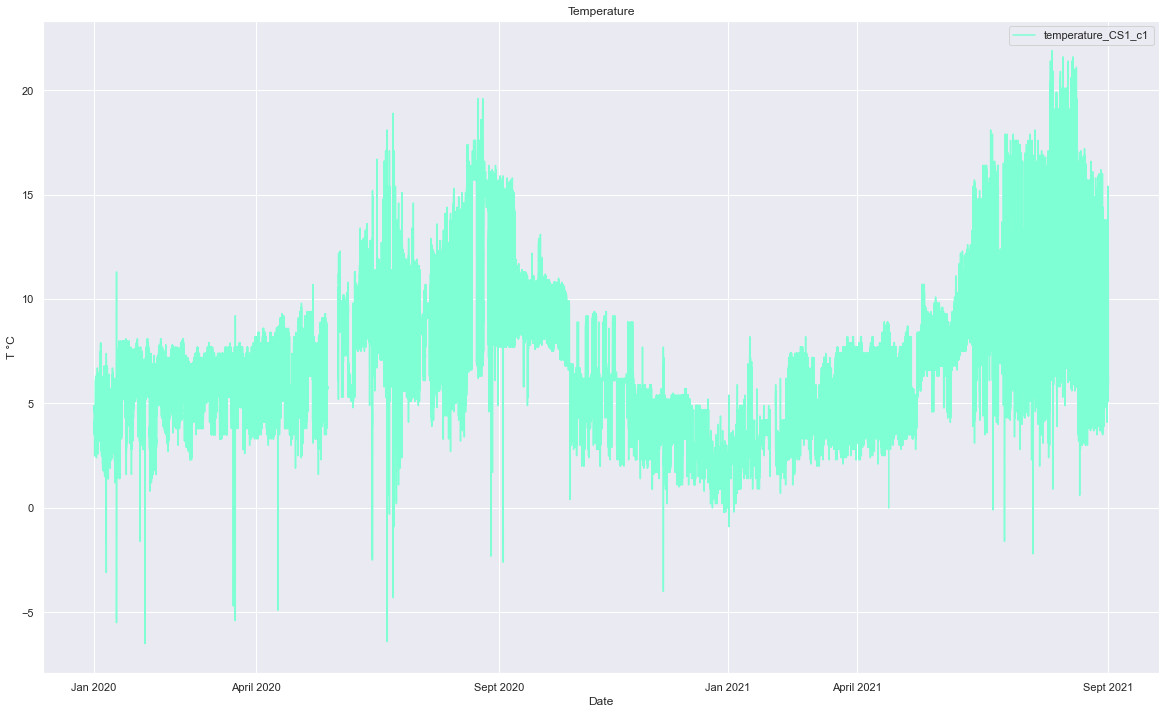

In [26]:
from matplotlib.ticker import FixedFormatter, FixedLocator

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(data['temperature_cs1_c1'], color = 'aquamarine')

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
plt.ylabel('T °C')
plt.title('Temperature')
ax.legend(loc = 'best', labels=['temperature_CS1_c1'])#, 'temperature_CS1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4'])

plt.show()

NameError: name 'df_temperature' is not defined

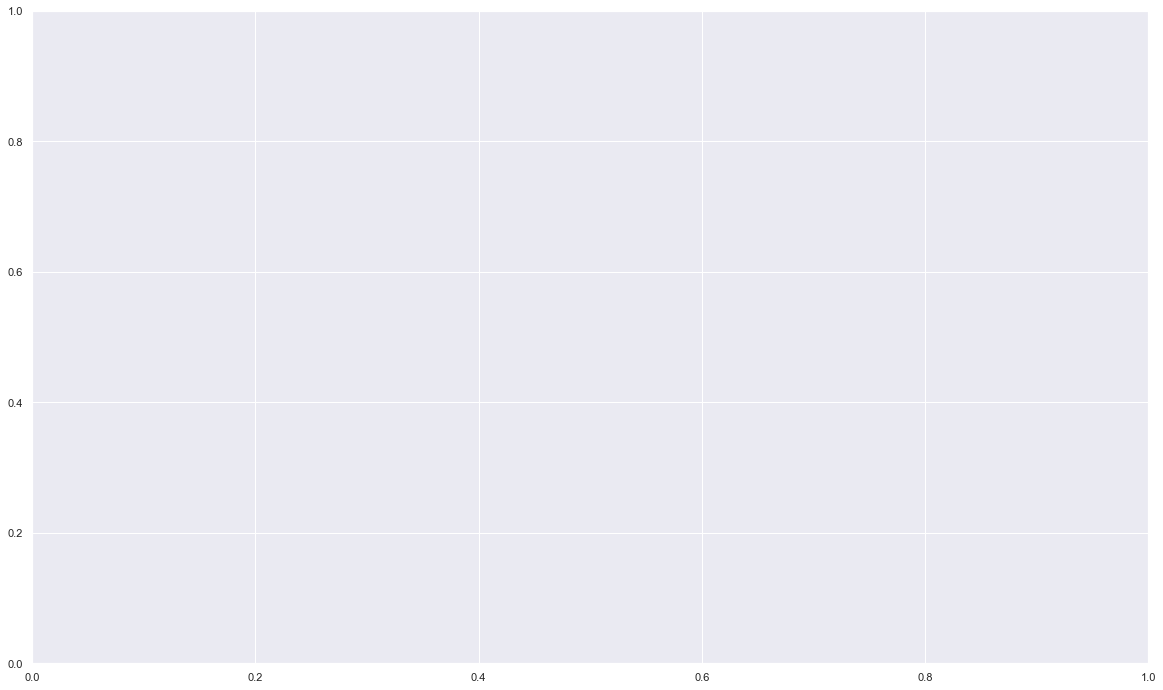

In [21]:
from matplotlib.ticker import FixedFormatter, FixedLocator

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_temperature['temperature_cs1_c1'], color = 'aquamarine')
ax.plot(df_temperature['temperature_cs1_c2'], color = 'chartreuse')
ax.plot(df_temperature['temperature_HS1_c1'], color = 'goldenrod')
ax.plot(df_temperature['temperature_HS1_c2'], color = 'orange')
ax.plot(df_temperature['temperature_c1.1'], color = 'darkgreen')
ax.plot(df_temperature['temperature_c1.2'], color = 'forestgreen')
ax.plot(df_temperature['temperature_c1.3'], color = 'springgreen')
ax.plot(df_temperature['temperature_c1.4'], color = 'lightgreen')
ax.plot(df_temperature['temperature_c2.1'], color = 'khaki')
ax.plot(df_temperature['temperature_c2.2'], color = 'gold')
ax.plot(df_temperature['temperature_c2.3'], color = 'moccasin')
ax.plot(df_temperature['temperature_c2.4'], color = 'yellow')


x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
plt.ylabel('T °C')
plt.title('Temperature')
ax.legend(loc = 'best', labels=['temperature_CS1_c1', 'temperature_CS1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4'])

plt.show()

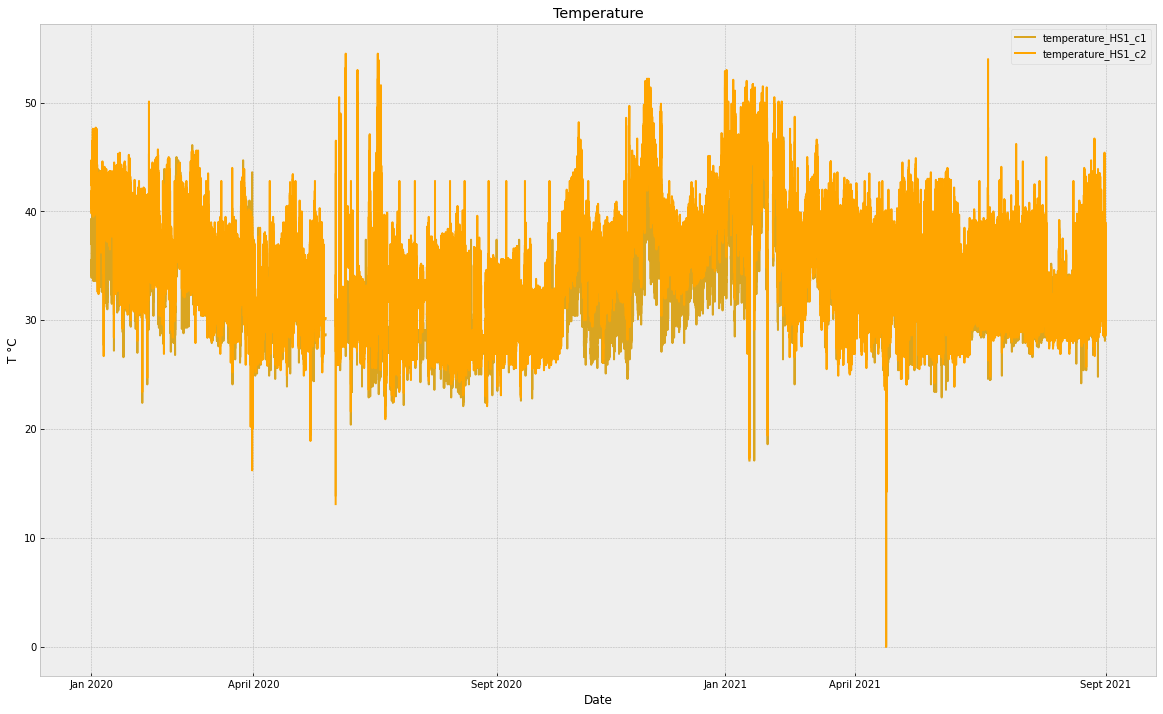

In [25]:
from matplotlib.ticker import FixedFormatter, FixedLocator

fig, ax = plt.subplots(figsize=(20,12))
#ax.plot(df_temperature['temperature_cs1_c1'], color = 'aquamarine')
#ax.plot(df_temperature['temperature_cs1_c2'], color = 'chartreuse')
ax.plot(df_temperature['temperature_HS1_c1'], color = 'goldenrod')
ax.plot(df_temperature['temperature_HS1_c2'], color = 'orange')

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
plt.ylabel('T °C')
plt.title('Temperature')
ax.legend(loc = 'best', labels=[ 'temperature_HS1_c1', 'temperature_HS1_c2'])
#'temperature_CS1_c1', 'temperature_CS1_c2',

plt.show()

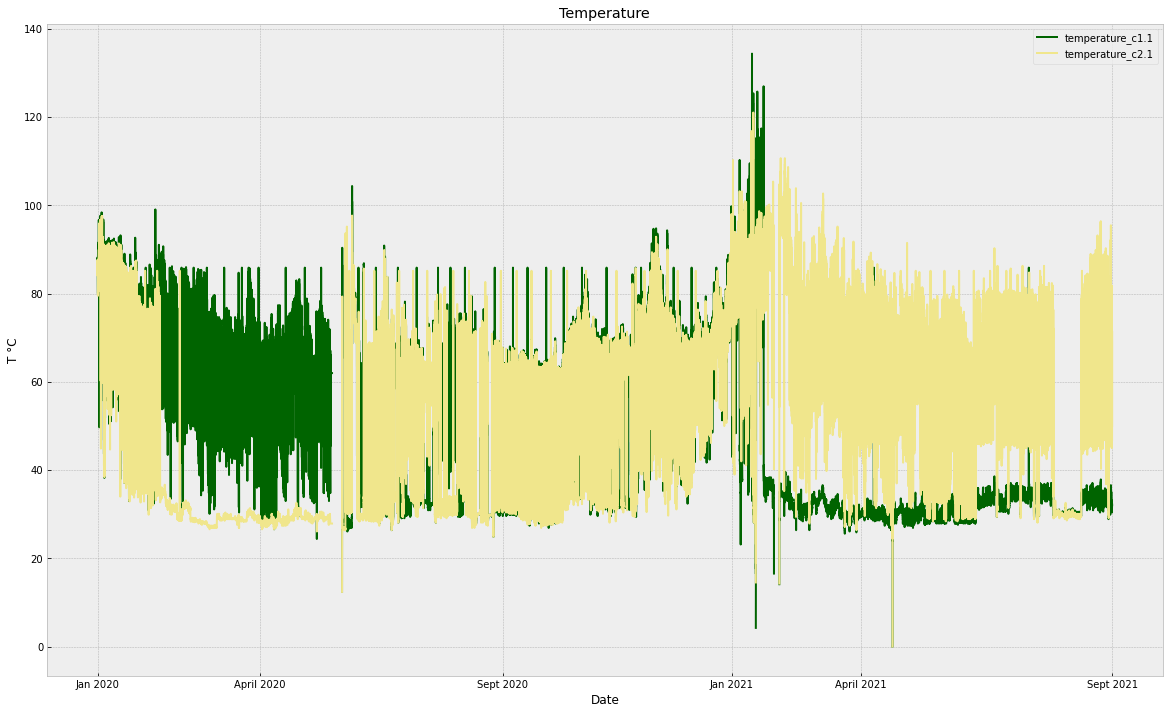

In [26]:

# df_temperature

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_temperature['temperature_c1.1'], color = 'darkgreen')
ax.plot(df_temperature['temperature_c2.1'], color = 'khaki')

#ax.plot(df_temperature['temperature_c1.2'], color = 'forestgreen')
#ax.plot(df_temperature['temperature_c2.2'], color = 'gold')

#ax.plot(df_temperature['temperature_c1.3'], color = 'springgreen')
#ax.plot(df_temperature['temperature_c2.3'], color = 'moccasin')

#ax.plot(df_temperature['temperature_c1.4'], color = 'lightgreen')
#ax.plot(df_temperature['temperature_c2.4'], color = 'yellow')

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
plt.ylabel('T °C')
plt.title('Temperature')
ax.legend(loc = 'best', labels=['temperature_c1.1', 'temperature_c2.1'])
#ax.legend(loc = 'best', labels=['temperature_c1.2', 'temperature_c2.2'])
#ax.legend(loc = 'best', labels=['temperature_c1.3', 'temperature_c2.3'])
#ax.legend(loc = 'best', labels=['temperature_c1.4', 'temperature_c2.4'])

plt.show()

In [ ]:

# df_temperature c2

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_temperature['temperature_c2.1'], color = 'khaki')
ax.plot(df_temperature['temperature_c2.2'], color = 'gold')
ax.plot(df_temperature['temperature_c2.3'], color = 'moccasin')
ax.plot(df_temperature['temperature_c2.4'], color = 'yellow')


x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
plt.ylabel('T °C')
plt.title('Temperature')
ax.legend(loc = 'best', labels=['temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4'])

plt.show()

In [ ]:
# df_compressor

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_compressor['C1a'], color = 'tan', linewidth= 0.5)
ax.plot(df_compressor['C1b'], color = 'wheat', linewidth= 0.5)
ax.plot(df_compressor['C2a'], color = 'darkolivegreen', linestyle ='--', alpha = 0.3, linewidth= 0.5)
ax.plot(df_compressor['C2b'], color = 'olive', alpha = 0.5, linewidth= 0.4)

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
plt.ylabel('T °C')
plt.title('Compressor states')
ax.legend(loc = 'best', labels=['C1a', 'C1b', 'C2a', 'C2b'])

plt.show()

In [ ]:
# still treating compressor
# count # of compressor off
off = df_compressor.isin([0]).sum()
print(off)

# count # compressor on
on = df_compressor.isin([1]).sum()
print(on)


In [ ]:
# df_flow

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_flow['water_flow_c2'], color = 'turquoise', linewidth = 0.3, alpha = 0.5)
ax.plot(df_flow['water_flow_c1'], color = 'skyblue', linestyle = '--', alpha = 0.4)

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
#plt.tick_params(labelbottom = False)
plt.ylabel('state')
plt.title('Water flow %')
ax.legend(loc = 'best', labels=['Circuit 2', 'HS1'])
plt.show()

In [ ]:
# df_expansion_valve

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_valve['exp_valve_c1'], color = 'darkgrey')
ax.plot(df_valve['exp_valve_c2'], color = 'lightslategrey', linestyle = '--', alpha = 0.3)

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
#plt.tick_params(labelbottom = False)
plt.ylabel('state')
plt.title('Expansion Valve state %')
ax.legend(loc = 'best', labels=['Circuit 1', 'Circuit 2'])
plt.show()

In [ ]:
# still treating expansion valve
# count # of time steps expansion valve 100%
hundred = df_valve.isin([0]).sum()
print(hundred)

In [ ]:
from matplotlib.ticker import FixedFormatter, FixedLocator

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(data_new['superheat_c1'], color = 'darksalmon', linestyle = '--')
ax.plot(data_new['superheat_c2'], color = 'lightpink', alpha = 0.3)

x_locator = FixedLocator([50, 140031, 349862, 547220, 658707, 875460])
x_formatter = FixedFormatter(['Jan 2020', 'April 2020', 'Sept 2020', 'Jan 2021', 'April 2021', 'Sept 2021'])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)

plt.xlabel('Date')
plt.ylabel('K')
plt.title('Superheat after outliers removal')
ax.legend(loc = 'best', labels=['superheat_c1', 'superheat_c2'])

plt.show()

In [ ]:
# variables dynamics with q1 on
q3_on = df.loc[(df['q3'] > 0)] #& (df['q2'] > 0) & (df['q1'] > 0)]

q3_on.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

print(q3_on['t_before_ec'].describe())
plt.figure(figsize=(9,8))
sns.distplot(q3_on['t_after_ec'], color='g', bins = 100, hist_kws={'alpha':0.4});